In [1]:
import cv2 
import matplotlib
import matplotlib.pyplot as plt

In [70]:
import cv2
import math
IMAGE_NUM = 100
def FrameCapture(path):
    vidObj = cv2.VideoCapture(path)
    frameRate = vidObj.get(5)
    count = 0
    success = 1
    while success:
        frameId = vidObj.get(1)
        success, image = vidObj.read()
        if (frameId % math.floor(frameRate) == 0):
            cv2.imwrite("./frames/frame%d.jpg" % count, image)
            count += 1
#             if cv2.waitKey(100000) & 0xFF == ord('q'):
#                 break
        if count >= IMAGE_NUM:
            break
    vidObj.release()
    cv2.destroyAllWindows()

In [71]:
FrameCapture('./videos/toronto.mp4') # INSERT THE FILE NAME 

In [61]:
import numpy as np
import os
from matplotlib.pyplot import imshow, imsave, imread
from os.path import isfile, join

def convert_frames_to_video(pathIn, pathOut, fps):
    frames = []
    files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
    print(files[0][5:-4])
    imshow(imread(pathIn + files[0]))
    plt.show()
    files.sort(key = lambda x: int(x[5:-4]))
    
    for i in range(len(files)):
        filename = pathIn + files[i]
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width, height)
        if i % 20 == 0:
            print(filename)
        frames.append(img)
    
    out = cv2.VideoWriter(pathOut, cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
    
    for i in range(len(frames)):
        out.write(frames[i])
    out.release()

0


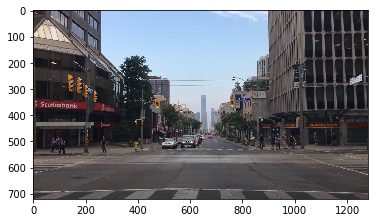

./frames/frame0.jpg
./frames/frame20.jpg
./frames/frame40.jpg
./frames/frame60.jpg
./frames/frame80.jpg


In [72]:
pathIn = './frames/' # CHANGE THE PACKAGE FOR FRAMES AND CHECK IF IT IS EXISTING
pathOut = './out_video/toronto_out2.mp4' # TYPE THE NAME OF THE VIDEO
fps = 5.0
convert_frames_to_video(pathIn, pathOut, fps)